---
## 第2章　教師あり学習の概要

### 2.1 導入
教師あり学習 (supervised learning) では、それぞれの問題に入力 (input)、出力 (ouput) として扱える変数が存在する。  
入力は分野により予測変数 (predictor)、独立変数 (independent variable)、特徴 (feature)などと呼ばれ、  
出力は応答変数 (response variable)、従属変数 (dependent variable)などと呼ばれる。  
  
### 2.2 変数の種類と用語
出力には量的変数 (quantitative variable)、質的変数 (qualitative variable) がある。  
質的変数はカテゴリ型変数 (categorical variable)、離散変数 (discrete variable)、因子 (factor)などと呼ばれることもある。  
  
予測問題は出力の種類によって異なる名称で呼ばれる。  
量的な出力を予測する問題は回帰 (regression) と呼ばれ、質的な出力を予測する問題は分類 (classification) と呼ばれる。  
これら2つのタスクには多くの共通点を有しており、共に関数近似 (function approximation) の問題とみなすことができる。  
  
3つ目の変数の種類として、 {小, 中, 大} といった順序付きカテゴリ型変数 (ordered categorical variable) がある。       
3つ以上のカテゴリがある場合、複数の数値化法が存在する。  
最もよく使われるものはダミー変数 (dummy variable) を用いる方法である。  
K水準の質的変数はK次元の二値ベクトルを使い、そのカテゴリに対応する要素を１，残りの要素を０として表現できる。  
  
本書では入力変数を $X$、その要素を $X_{j}$、量的な出力を $Y$、質的な出力を $G$ と表記する。
大文字かつ太字の変数は行列を表す。

---
### 2.3 予測のための2つの簡単なアプローチ：最小二乗法と最近傍法

線形モデルでは、入力ベクトル $X^{\mathrm{T}} = (X_{1}, X_{2}, \ldots, X_{p})$ が与えられた時、出力 $Y$ を  

\begin{align*}
\hat{Y} = \hat{\beta}_{0} + \sum_{j=1}^{p} X_{j} \hat{\beta}_{j}
\end{align*}

と予測する。ここで $\hat{\beta}_{0}$ は切片 (intercept) を表し、バイアス (bias) と呼ばれることもある。  
定数１を $X$ に加えてベクトル表記に変形すると

\begin{align*}
\hat{Y} = X^{\mathrm{T}}\hat{\beta}
\end{align*}

となり、内積の形に簡易化することができる。


####  最小二乗法 (least squares) 
残差二乗和  

\begin{align*}
RSS(\beta) = \sum_{i=1}^{N} (\hat{y}_{i} - f(x_{i}^{\mathrm{T}} \beta ))^{2}
\end{align*}

を最小にする $\beta$ を選択する。  
$RSS(\beta)$ はパラメータ $\beta$ の二次関数であるので必ず最小値が存在するが、一般に一意な解を得られる保証はない。  
上の式を行列表記すると  

\begin{align*}
RSS(\beta) = (\mathbf{y} - \mathbf{X}\beta)^{\mathrm{T}} (\mathbf{y} - \mathbf{X} \beta)
\end{align*}

となる。ここで $\mathbf{X}$ は各行が入力ベクトルに対応する $N \times p$ 行列、  
$\mathbf{y}$ は各要素が出力に対応する $N$ 次元ベクトルである。  
これを $\beta$ に関して偏微分すると、正規方程式 (normal equation)  

\begin{align*}
\mathbf{X}^{\mathrm{T}} (\mathbf{y} - \mathbf{X} \beta) = 0
\end{align*}

を得る。$\mathbf{X}^{\mathrm{T}}\mathbf{X}$ が特異でなければ、正規方程式の一意な解を  

\begin{align*}
\hat{\beta} = (\mathbf{X}^{\mathrm{T}} \mathbf{X})^{-1} \mathbf{X}^{\mathrm{T}} \mathbf{y}
\end{align*}

と求めることができる。  
$i$ 番目の入力 $x_{i}$ に当てはめた値は $\hat{y}_{i} = \hat{y}(X_{i}) = x_{i}^{\mathrm{T}}\hat{\beta}$ となり、任意の入力 $x_{0}$ に対して $x_{0}^{\mathrm{T}}\hat{\beta}$ が予測値となる。  
このような予測値を集めて構成される超平面は $p$ 次元パラメータ $\beta$ により特徴づけられる。    
  
　＊　  
  
次に、分類問題の枠組みで考える。  
２クラス分類問題では、出力のクラスを表す変数 $G$ は例えば青クラス／オレンジクラスの値をとる。  
応答変数 $Y$ を青クラスが0、オレンジクラスが1として線形モデルを当てはめ、
モデルの出力値 $\hat{Y}$ が  

\begin{align*}
\hat{G} = \begin{cases} &\text{orange} &\hat{Y}>0.5 \\
&\text{blue} &\hat{Y} \leq 0.5 \end{cases}
\end{align*}

とクラス変数 $G$ に変換されるものとする。  
図示したものは下の通り。

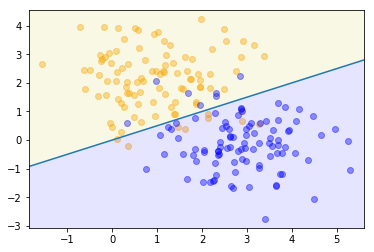

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

X1 = np.random.randn(100,2) + np.array([1,2])
X2 = np.random.randn(100,2) + np.array([3,0])
DBx = np.arange(np.min(X1[:,0])-3, np.max(X2[:,0])+3, 0.1)

plt.scatter(X1[:,0], X1[:,1], c='orange', marker="o", alpha=0.4)
plt.scatter(X2[:,0], X2[:,1], c='blue', marker="o", alpha=0.4)
plt.plot(DBx, DBx*0.5)

plt.fill_between(DBx, DBx+20, DBx*0.5, facecolor='y', alpha=0.1)
plt.fill_between(DBx, DBx*0.5, DBx-20, facecolor='b', alpha=0.1)
plt.xlim(np.min(X1[:,0])-0.3, np.max(X2[:,0])+0.3)
plt.ylim(np.min(X2[:,1])-0.3, np.max(X1[:,1])+0.3)

plt.show()

図中で２つのクラスの予測結果は、    
この場合線形な決定境界 (decision boundary) $\{ x : x^{\mathrm{T}}\hat{\beta} = 0.5 \}$ によって隔てられている。   
  
各クラスのデータがそれぞれ１つのガウス分布から生成されているとき、線形決定境界は最適な選択であり、  
２つのクラスの重なりはやむを得ず、予測に与える重複領域の悪影響を避けることはできない。  
  
一方、データが混合ガウス分布から生成されているとき、線形決定境界は一般に最適でない。  